#..............Travelling Salesman Problem (TSP).......

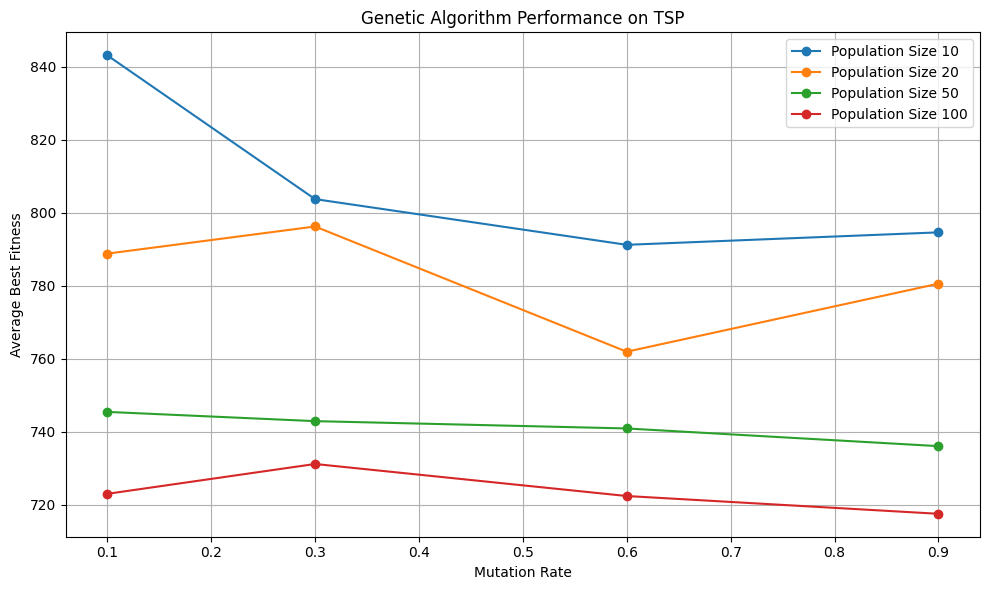


Results Summary:
Population Size: 10, Mutation Rate: 0.9 -> Average Best Fitness: 794.65
Population Size: 10, Mutation Rate: 0.6 -> Average Best Fitness: 791.24
Population Size: 10, Mutation Rate: 0.3 -> Average Best Fitness: 803.77
Population Size: 10, Mutation Rate: 0.1 -> Average Best Fitness: 843.22
Population Size: 20, Mutation Rate: 0.9 -> Average Best Fitness: 780.58
Population Size: 20, Mutation Rate: 0.6 -> Average Best Fitness: 761.93
Population Size: 20, Mutation Rate: 0.3 -> Average Best Fitness: 796.26
Population Size: 20, Mutation Rate: 0.1 -> Average Best Fitness: 788.82
Population Size: 50, Mutation Rate: 0.9 -> Average Best Fitness: 736.04
Population Size: 50, Mutation Rate: 0.6 -> Average Best Fitness: 740.88
Population Size: 50, Mutation Rate: 0.3 -> Average Best Fitness: 742.89
Population Size: 50, Mutation Rate: 0.1 -> Average Best Fitness: 745.43
Population Size: 100, Mutation Rate: 0.9 -> Average Best Fitness: 717.48
Population Size: 100, Mutation Rate: 0.6 -> A

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import multiprocessing

# Parameters
n_cities = 20
population_sizes = [10, 20, 50, 100]
mutation_rates = [0.9, 0.6, 0.3, 0.1]
iterations = 50  # Number of iterations per run (reduced for faster execution)
runs = 10  # Number of runs per parameter combination

# Generate random cities
cities = np.array(['Berlin', 'London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv',
                   'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'])
coordinates = np.random.randint(0, 100, size=(n_cities, 2))
cities_dict = {city: coord for city, coord in zip(cities, coordinates)}

# Function to compute distance between two cities
def compute_distance(city1, city2):
    coord1 = cities_dict[city1]
    coord2 = cities_dict[city2]
    return np.linalg.norm(coord1 - coord2)

# Function to generate initial population
def generate_initial_population(city_list, population_size):
    population = []
    for _ in range(population_size):
        solution = city_list.copy()
        np.random.shuffle(solution)
        population.append(solution)
    return population

# Function to evaluate fitness of a solution (total distance)
def evaluate_fitness(solution):
    total_distance = 0
    for i in range(len(solution) - 1):
        total_distance += compute_distance(solution[i], solution[i+1])
    total_distance += compute_distance(solution[-1], solution[0])  # Return to starting city
    return total_distance

# Function for selection: Roulette wheel selection
def select_parents(population, fitness_scores):
    total_fitness = sum(fitness_scores)
    probabilities = [score / total_fitness for score in fitness_scores]
    parents = random.choices(population, weights=probabilities, k=2)
    return parents[0], parents[1]

# Function for crossover: Order 1 crossover
def crossover(parent1, parent2):
    n = len(parent1)
    start, end = sorted(random.sample(range(n), 2))
    temp = parent1[start:end+1].copy()
    child = [-1] * n

    child[start:end+1] = temp
    for i in range(n):
        if child[i] == -1:
            for j in range(n):
                if parent2[j] not in child:
                    child[i] = parent2[j]
                    break

    return child

# Function for mutation: Swap mutation
def mutate(solution, mutation_rate):
    if random.random() < mutation_rate:
        idx1, idx2 = random.sample(range(len(solution)), 2)
        solution[idx1], solution[idx2] = solution[idx2], solution[idx1]
    return solution

# Genetic algorithm main loop
def genetic_algorithm(city_list, population_size, mutation_rate, num_iterations):
    # Generate initial population
    population = generate_initial_population(city_list, population_size)
    best_solution = None
    best_fitness = float('inf')
    all_best_fitness = []

    # Evolution loop
    for generation in range(num_iterations):
        # Evaluate fitness for each solution in the population
        fitness_scores = [evaluate_fitness(solution) for solution in population]

        # Find the best solution in the current population
        min_fitness = min(fitness_scores)
        if min_fitness < best_fitness:
            best_fitness = min_fitness
            best_solution = population[fitness_scores.index(min_fitness)].copy()

        all_best_fitness.append(best_fitness)

        # Selection and crossover to create new population
        new_population = []
        for _ in range(population_size // 2):
            parent1, parent2 = select_parents(population, fitness_scores)
            child1 = crossover(parent1, parent2)
            child2 = crossover(parent2, parent1)

            # Mutation
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)

            new_population.append(child1)
            new_population.append(child2)

        # Replace the old population with the new population
        population = new_population

    return best_solution, best_fitness, all_best_fitness

# Function to run GA and return results
def run_ga(population_size, mutation_rate):
    avg_best_fitness = 0
    for _ in range(runs):
        _, best_fitness, all_best_fitness = genetic_algorithm(cities, population_size, mutation_rate, iterations)
        avg_best_fitness += min(all_best_fitness) / runs
    return avg_best_fitness

# Running the genetic algorithm for each combination of parameters
results = {}
for population_size in population_sizes:
    for mutation_rate in mutation_rates:
        results[(population_size, mutation_rate)] = run_ga(population_size, mutation_rate)

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 6))
for population_size in population_sizes:
    y_vals = [results[(population_size, mutation_rate)] for mutation_rate in mutation_rates]
    ax.plot(mutation_rates, y_vals, marker='o', label=f'Population Size {population_size}')

ax.set_xlabel('Mutation Rate')
ax.set_ylabel('Average Best Fitness')
ax.set_title('Genetic Algorithm Performance on TSP')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# Summarizing results
print("\nResults Summary:")
for (population_size, mutation_rate), avg_best_fitness in results.items():
    print(f"Population Size: {population_size}, Mutation Rate: {mutation_rate} -> Average Best Fitness: {avg_best_fitness:.2f}")


#..........maximization problem

Initial Population:
 [[ 84.38686528  71.01053809  90.97502376]
 [-97.93829598  91.57427994 -44.24027303]
 [ 62.82006458  -0.82477506  73.91910992]
 [-15.40920097  80.13782435 -65.85525411]
 [-85.73620347  16.8535488    4.38463542]
 [-19.78771    -26.01830834 -23.64563299]
 [-47.19490251  10.92659736  -6.51413828]
 [-25.94997053  -1.6388189  -90.21119978]
 [-91.2128768   28.93826525  47.29877049]
 [-50.07666896 -25.8890696  -80.25340144]
 [ 55.62721734 -12.47732592 -59.44759045]
 [  8.52914663 -21.73990154  -1.32067468]
 [ 23.8793892  -88.28070454  50.71803245]
 [-15.76611498 -38.20258441  40.88891292]
 [-46.01595475 -65.44191961 -41.55529028]
 [-84.46424662  88.52214324 -96.00554556]
 [ -8.8675616  -30.97454219 -93.43353664]
 [ 50.04907666 -33.00011879 -37.63043059]
 [-42.71247571 -77.23976752  60.46502648]
 [ 49.88414331 -13.10568734  12.45566635]
 [-73.15004365 -47.66199863  23.82226313]
 [ 13.88219872  71.48564768  68.21000492]
 [-81.82452239  24.46893283 -90.91748659]
 [-45.7009837

C:\Users\SYSTEM-1\AppData\Local\Temp\ipykernel_3048\1493285884.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  offspring_crossover[idx, i] = offspring_crossover[idx, i] + random_value


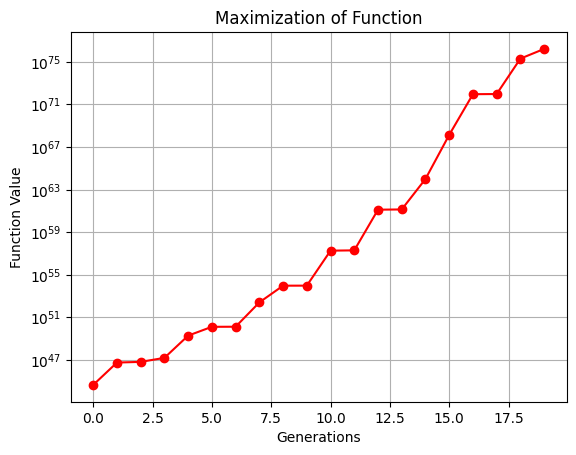

In [2]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt


def genesis(size, var, high, low):
    # Initialize the population randomly within specified bounds
    pop_size = (size, var)
    new_pop = np.random.uniform(low=low, high=high, size=pop_size)
    return new_pop

#  mathematical equation
def equation(x, y, z):
    return 2 * x * z * np.exp(-x) - x - 2 * y**3 + y**2 - 3 * z**3

def fitness(p):
    # Calculate fitness for each individual in the population
    fitness = np.zeros((len(p), 1))
    for i in range(len(p)):
        x, y, z = p[i][0], p[i][1], p[i][2]
        # Evaluate fitness using the defined equation
        fitness[i, 0] = equation(x, y, z)
    return fitness

def selection(pop, fitness, num_parents):
    # Select the best individuals as parents based on their fitness
    parents = np.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = np.argmax(fitness)
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -np.inf  # Marking this fitness as evaluated
    return parents

def crossover(parents, offspring_size):
    # Perform crossover to create new offspring
    offspring = np.empty(offspring_size)
    crossover_point = np.uint8(offspring_size[1] / 2)
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k + 1) % parents.shape[0]
        # Crossover at the halfway point
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover):
    # Introduce random mutations in the offspring
    for idx in range(offspring_crossover.shape[0]):
        random_value = np.random.uniform(-10, 10, 1)
        i = randint(0, 2)  # Randomly select which gene to mutate
        offspring_crossover[idx, i] = offspring_crossover[idx, i] + random_value
    return offspring_crossover

# Parameters
num_var = 3
sizeof_pop = 100
upper_limit = 100
lower_limit = -100
num_parents = 2
num_generations = 20

# Initialize the population
population = genesis(sizeof_pop, num_var, upper_limit, lower_limit)
print("Initial Population:\n", population)

# Track scores over generations
Scores = []

# Evolution loop
for generation in range(num_generations):
    print("\n\nGeneration:", generation)
    
    # Calculating fitness of the population
    fitness_score = fitness(population)
    
    # Selectinfg the best parents
    parents = selection(population, fitness_score, num_parents)
    print("Best Parents:\n", parents)
    
    # Generateing offspring through crossover
    offspring_crossover = crossover(parents, offspring_size=(2 * num_parents, num_var))
    
    # Mutate the offspring
    offspring_mutation = mutation(offspring_crossover)
    print("Mutated Offsprings:\n", offspring_mutation)
    
    # Createing the new population
    population[0:parents.shape[0], :] = parents
    population[parents.shape[0]:6, :] = offspring_mutation
    
    # Record the best fitness score for the generation
    Scores.append(np.max(fitness_score))
    print("Best result:", np.max(fitness_score))

# Plot the fitness scores over generations
Evaluations = Scores
plt.plot(Evaluations, 'o-', color='red')
plt.yscale('log')
plt.xlabel('Generations')
plt.ylabel('Function Value')
plt.title("Maximization of Function")
plt.grid(True)
plt.show()
